# A Tutorial: How Environmental Indicators have Changed from 1961 - 2022
  
**By: Karen Fung, Fall 2022**

![Sea](sea.jpg "Title")

## Part 1: Data Collection/ Curation

### Motivation
In recent years taking care of the environment, and highlighting the impacts of bad decisions made on the environment has come to the forefront. For me, and many of my peers, addressing climate change is one of our top priorities. While to some degree my personal experience of changing climates in the world has developed much of my perspective towards the topic, I wanted to look at some more data based changes. While I hear of the increasing number of wildfires, and breaking peak temperatures, I took this opportunity to analyze the trends of some of these indicators, to get a look at just how much the environmental indicators have changed.

I wanted to be able to get a more comprehensive look at how certain ecvironmental indicators have changed beyond my own annecdotal experience. The best way to do so would be to look at the trend lines of certain environmental indicators have changed in recent time. For this project: I have chosen to focus on Sea Level and the Acturial Climate Index(ACI).

Ultimately, my chosen dataset is the Actuaries Climate Index Dataset downloaded here: https://actuariesclimateindex.org/data/

### Finding the Dataset
In the process of finding this dataset, there are several steps to finding a good and well rounded data-set. There are many forms in the real world that data is represented. There are several options in the format of data used to begin this process. Amongst the many forms of data I encountered when looking for an interesting dataset, there are csv, excel, json, as well as websites. If needing data from a website directly, then parsing would be necessary. In this case, my chosen dataset is in the formal of an excel file, and from the above linked website, I was able to download the excel directly, and import it into my jupyter-notebook to be used in the data analysis and processing process.

Additionally, a huge part of finding the datasets was where they were. This dataset was found in a curated list of datasets recommended by my professor: https://github.com/awesomedata/awesome-public-datasets

However, there are also many other sources of data. Another one that I had looked at extensively was the open datasets for my home state, New Jersey. https://data.nj.gov/ There are usually open data sources like these for most states, and they have data for a wide variety of topics. One thing that I did notice in my search, is that these government based datasets tend to have data in slightly different forms. A lot of them stored the data in tables in a pdf format, rather then an actual dataset. 

### Information About This Dataset
This dataset, labeled the Actuaries Climate Index, is a cooperation of the American Academy of Actuaries, Casualty Actuarial Society, Candian Institute of Actuaries, and Society of Actuaries, to compile this data set. The underlying data for this dataset is based from an extensive network of meterological stations and coastal tide stations.

This dataset is a .xls, which is an excel file. Within this file there is an number of excel sheets. These include:
- Contents
- Sea Level Stations
- Sea Level Monthly
- Sea Level Seasonal
- Sea Level Unstandardized
- Consecutive Dry Days (CDD) Monthly
- Consecutive Dry Days (CDD) Seasonal
- Consecutive Dry Dats (CDD) Unstandardized
- Rx5Day Monthly
- Rx5Day Seasonal
- Rx4day Unstandardzied
- T10 Monthly
- T10 Seasonal
- T10 Unstandardized
- T90 Monthly
- T90 Seasonal
- T90 Unstandardized
- WP90 Montly
- WP90 Seasonal
- WP90 Unstandardized
- ACI Combined Monthly
- ACI Combined Seasonal


### Information About Measurements in This Data
This data measures several variables, or indicators of the environment. It is a good idea to define these labels. For the Actuaries Climate Index, they elaborate on these variables in their page for data disclosure: https://actuariesclimateindex.org/data/data-disclosure/. It is helpful to define these variables in advance, so as to ease the interpretation of future analysis and visualizations.

We focused on:
##### Sea Level
Resources: 
- https://www.c2es.org/document/sea-level-rise-global-climate-change-a-review-of-impacts-to-u-s-coasts/#:~:text=The%20primary%20impacts%20of%20sea,%2C%20agriculture%2C%20and%20wildlife%20viewing. 
- https://www.nationalgeographic.com/environment/article/sea-level-rise-1

It's a bit self explanatory, it is the level of the sea. In this section, It's valuable to explain exactly what changing sea levels mean. Rising sea levels have a large variety of impacts on both the environment, and humans. On a bit of a shallow level, it impacts things such as tourism, shipping, fishing, agriculture, and wildlife, and housing. As sea levels rise or decline, just imagine how much coastal real estate is lost by even an increase in sea level of one inch. These severely impact on habitats, and worsens erosion, leaving even less livable land for animals. 
##### Acturaial Climate Index(ACI)
The Actuarial Climate Index is the combined result of the average of the (T90 - T10 + CDD + Rx5day + WP90 + sealevel)
In general it is a measurement of the change of these environmental indicators.

T90 = Percentage of Days in a month which the high temperature exceeds the 90th percentile
T10 = Percentage of Days in a month in Which the Low temperature is below the 10th percentile
CDD = The maximum number of consecutive days during a year with precipitation less than one millimeter (in days)
Rx5day = Monthly maximum consecutive 5-day precipitation amount in a month (in millimeters)
WP90 =Percentage of days in a month in which the wind power exceeds the 90th percentile of the reference period

## Part 2: Data Management/Representation

First, as all data science projects go, it is imperative to perform the imports necessary for this project to function. 

The central one to much of what we will be doing is **pandas**, where we imported as pd. The as allows us to used pd as a shorthand, it helps with keeping our code more readable :).

Note: in order to use read_excel, I did have to install an optional dependency

In [59]:
import pip
# pip.main(["install", "openpyxl"]) ## Needed for the read_excel process. It's commented out as it only needs to run once 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Reading the Data

In [6]:
stations = pd.read_excel('Actuaries_Climate_Index.xlsx', sheet_name = 'Sea Level Stations')
stations.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,List of Sea Level Stations Included in the ACI,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,#,Region,Station Name
4,NaN,NaN,NaN,NaN


### Processing the Data
Since we started with a .xlsx, the data should be in table form and be relatively clean, right? Perhaps. But not always.
In our case this is clearly not true. The data I've chosen to some degree has been formatted for readability purposes(it's quite pretty to look at in excel), but complicates the data process slightly. 

As seen above, there seems to be an extra column added, as well as the title of the sheet being input as a column. All of this needs to be removed. Additionally, the columns appear to be incorrectly named. All of this needs to fixed for readability of our dataset, and for future processes.

In [7]:
# This is repetitive, just for ease of re-running this code block
stations = pd.read_excel('Actuaries_Climate_Index.xlsx', sheet_name = 'Sea Level Stations')

stations = stations.iloc[5:].reset_index()
stations.drop(stations.columns[[0,1]], inplace=True, axis=1)
stations.columns = ["#", "Region", "Station Name"]
stations.head()

print(stations["Region"].unique())
stations.head()

['ALA' 'CEA' 'CWP' 'NEA' 'NEF' 'NPL' 'NWP' 'SEA' 'SPL' 'SWP']


,#,Region,Station Name
0,1,ALA,UNALASKA
1,2,ALA,SELDOVIA
2,3,ALA,SEWARD
3,4,ALA,CORDOVA
4,5,ALA,YAKUTAT


Now it is a lot cleaner! From this point we will do the same processes for all of our other relevant data sets. 

#### 2.1 Stations Dataset Information
In the above Stations dataset, there are 3 columns:
- '#' = (Number Assigned to the Station)
- Region (Region Station is assigned)
- Station Name (Name of Station)

While in future analysis I will not be using this data for analysis purposes, this is done to be able to interpret the regions.
In total there are 10 Regions listed. The dataset unfortunately does not tell us what each of these mean, but by the given locations, we are able to do research and define these variables. This will not be necessary for our analysis, but it may be helpful just to know.

- ALA - Alaska
- CEA - North Eastern US States
- CWP - Generally North West Coast Region
- NEA - CharlotteTown, Canada
- NEF - Canada
- NPL - Churchill, Canada
- NWP - British Columbia, Canada
- SEA - Florida
- SPL - Texas
- SWP - California

As well as regions represented in the data, but not listed on the stations page:
- CAR - Carribean (Fairly certain, not 100% Sure)
- MID - Mid Atlantic (Fairly certain)
- CAN - Canada
- USA - United States of America 
- USC - Unknown (Possibly University of Southern California)


In [8]:
# Reading the Sea Level Unstandardized
sea = pd.read_excel('Actuaries_Climate_Index.xlsx', sheet_name = 'Sea Level Unstandardized')

# Removing the rows with non-relevant info
sea = sea.iloc[5:].reset_index()

# Drops rows that contain Sea Level Unstandardized Seasonal. We only want the Monthly Data
sea.drop(sea.columns[[0,1]], inplace=True, axis=1)
sea.drop([2,3,5,8], inplace=True)
sea.drop(sea.index[15:39], inplace = True)
sea = sea.reset_index() # Resetting the index after removing columns and rows
sea.drop(sea.columns[[0]], inplace = True, axis=1) # Removing the column generated by the reset

# Transpose so we have year and month as a column for ease of data visualization later
sea = sea.transpose().reset_index()
sea.drop(sea.columns[[0]], inplace = True, axis=1)

# Finding and Setting Column Headers from the first row
header = sea.iloc[0]
header[0] = 'Year'
header[1] = 'Month'
sea = sea.iloc[1:]
sea.columns = header

# Setting appropriate types, since it was all read in as object or float. 
sea['Year'] = sea['Year'].astype(int)
sea['Month'] = sea['Month'].astype(int)
for col in sea:
    if col != 'Year' and col != 'Month':
        sea[col] = sea[col].astype(float)
sea['DateTime'] = pd.to_datetime(dict(year=sea.Year, month = sea.Month, day = 1))
sea.head()

,Year,Month,ALA,CEA,CWP,NEA,NEF,NPL,NWP,SEA,SPL,SWP,CAN,USA,USC,DateTime
1,1961,1,7291.44,6890.32,7145.4,7055.0,6726.7,7405.0,7128.89,6874.00,6809.00,7064.88,7015.84,6987.42,6993.40,1961-01-01
2,1961,2,7241.67,6976.14,7164.2,6995.0,6932.8,7270.0,7121.76,6908.23,6834.33,7003.50,7064.05,7013.48,7024.13,1961-02-01
3,1961,3,7190.22,7031.96,7186.8,6985.0,6966.6,7220.0,7059.41,6975.00,6923.00,6976.88,7035.80,7043.47,7041.85,1961-03-01
4,1961,4,7048.78,7055.23,6955.2,6995.0,7344.0,7370.0,6947.51,6952.77,6930.00,6949.75,7100.79,7003.40,7023.90,1961-04-01
5,1961,5,7035.11,7009.41,6978.4,6905.0,7184.0,7360.0,6961.49,6987.69,6962.67,6928.63,7052.40,6992.87,7005.40,1961-05-01


#### 2.2 Sea Level Dataset Information
In the above `sea` dataset, there are 15 columns:
- Year (Ranging from 1961 - 2022)
- Month (12 possibilities, 1 is January and other are as follows in normal month order)
- Regions (Columns 3 - 15)
- DateTime 

Measurement Stored: Sea-Level in milimeters

In [9]:
# Reading ACI(Acturial Combined Index) Dataset
aci = pd.read_excel('Actuaries_Climate_Index.xlsx', sheet_name = 'ACI Combined Monthly')

aci = aci.iloc[5:]

# Dropping unneeded column
aci.drop(aci.columns[[0]], inplace=True, axis=1)

# Dropping unneeded rows/ Empty Rows
aci.drop([7,8], inplace=True)
aci.drop(aci.index[17:40], inplace = True)
aci = aci.reset_index()
aci.drop(aci.columns[[0]], inplace = True, axis = 1)

# Transpose the dataset, so the regions aci is by column
aci = aci.transpose().reset_index()
aci.drop(aci.columns[[0]], inplace = True, axis = 1)

# Find header and set column titles to it.
header = aci.iloc[0]
header[0] = 'Year'
header[1] = 'Month'
aci = aci.iloc[1:]
aci.columns = header

# Setting appropriate types for columns for ACI
aci['Year'] = aci['Year'].astype(int)
aci['Month'] = aci['Month'].astype(int)

for col in aci:
    if col != 'Year' and col != 'Month':
        aci[col] = aci[col].astype(float)
aci['DateTime'] = pd.to_datetime(dict(year=aci.Year, month = aci.Month, day = 1))
display(aci)

,Year,Month,ALA,CAR,CEA,CWP,MID,NEA,NEF,NPL,NWP,SEA,SPL,SWP,CAN,USA,USC,DateTime
1,1961,1,0.68,0.59,-0.82,0.36,-0.46,-0.20,-0.59,0.34,0.66,-0.68,-0.48,-0.08,0.26,-0.25,-0.20,1961-01-01
2,1961,2,-0.10,-0.36,0.04,0.89,0.23,-0.18,0.38,0.88,0.71,0.59,0.03,0.02,0.71,0.50,0.47,1961-02-01
3,1961,3,-0.04,-0.36,-0.07,0.59,0.49,-0.01,0.35,0.30,0.29,0.38,0.00,0.11,0.21,0.38,0.23,1961-03-01
4,1961,4,0.07,-0.74,-0.05,-0.06,-0.43,0.31,-0.08,0.31,0.38,-0.17,-0.58,0.04,0.14,-0.11,-0.06,1961-04-01
5,1961,5,0.19,-0.70,-0.60,0.23,-0.03,0.67,-0.22,0.13,0.43,-0.46,-0.46,-0.14,-0.07,-0.22,-0.20,1961-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,2022,1,0.07,0.20,0.55,0.46,-0.28,0.32,0.46,0.79,1.27,0.43,0.28,0.16,1.39,0.61,0.96,2022-01-01
734,2022,2,0.22,0.13,0.85,-0.58,-0.06,0.74,0.82,0.60,1.17,0.37,0.33,-0.38,1.14,0.13,0.52,2022-02-01
735,2022,3,-0.98,0.80,0.05,0.10,0.00,0.54,0.63,0.79,0.99,0.34,0.56,0.02,1.28,0.17,0.54,2022-03-01
736,2022,4,-1.41,-0.20,0.46,-0.10,-0.45,0.74,0.46,0.73,0.45,0.26,0.82,0.51,0.89,0.28,0.42,2022-04-01


#### 2.3 ACI Dataset Information
In the above `aci` dataset, there are 18 columns:
- Year (Ranging from 1961 - 2022)
- Month (12 possibilities, 1 is January and other are as follows in normal month order)
- Regions (Columns 3 - 17)
- DateTime 

## Part 3: Exploratory Data Analysis
### 3.1 Sea Level Analysis
#### Scatterplots

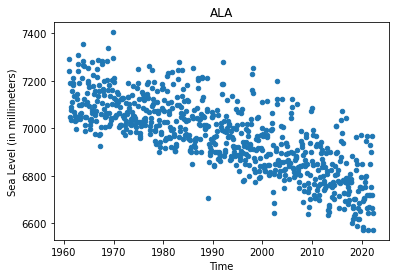

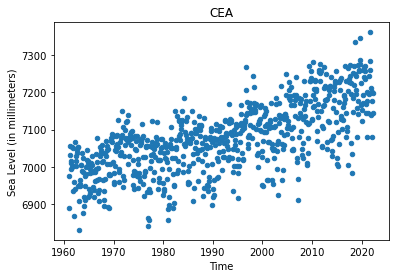

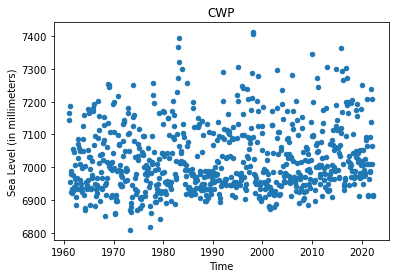

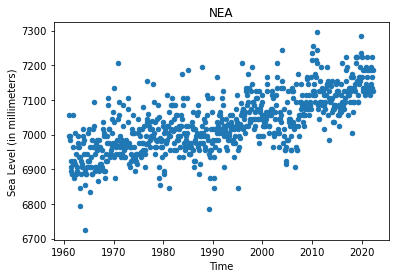

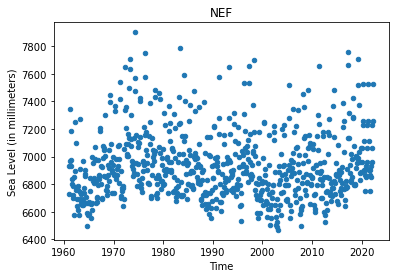

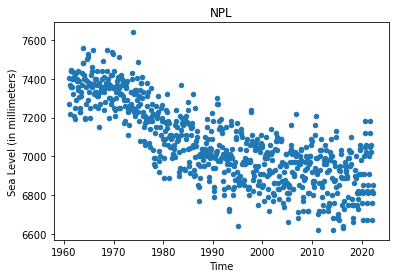

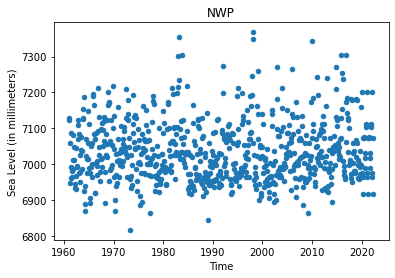

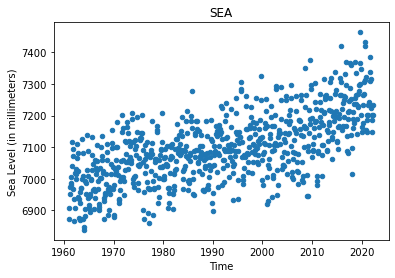

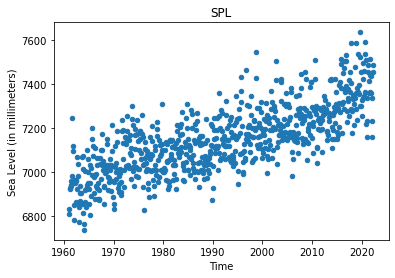

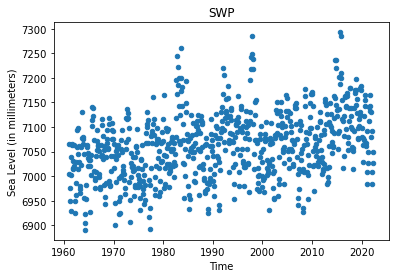

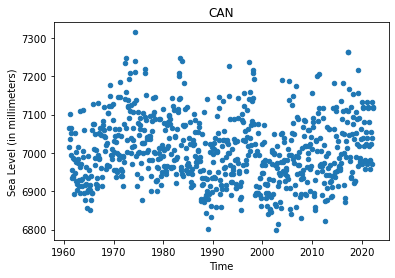

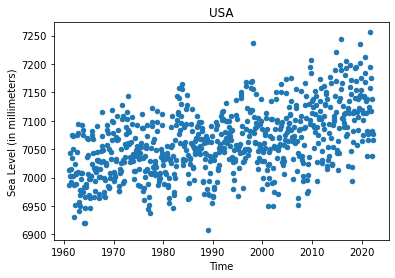

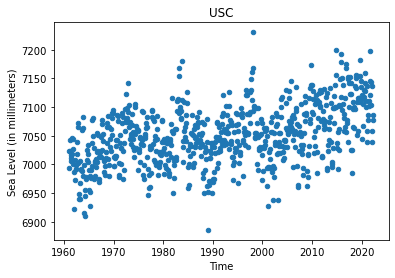

In [10]:
for col in sea:
    if col != 'Year' and col != 'Month' and col != 'DateTime':
        ax =sea.plot.scatter(x='DateTime', y =col)
        ax.set_title(col)
        ax.set(xlabel = "Time", ylabel = "Sea Level (in millimeters)")

Interestingly enough, the graphs of the sea level over time for each of these regions do vary. Despite my expectations that the sea level would **rise** in all regions, there is some variation. 

Of the 13 regions that recorded Sea Level data, 7 appear to display an increase in sea level over time, 2 decrease in sea level over time, and 4 where it appears to stay relatively the same. This is interesting, as while I have heard of sea level increasing over time due to climate change, I haven't really heard of a decrease in sea level happening over time. It's interesting to wonder why this is the case, and what different climate impacts this has.

However, there are also several regions with similar results. Going forward, to reduce the number of graphs, we will choose a couple regions of interest. Based on these scatterplots, we will focus on ALA, USA, CAN, SPL.

We have chosen to do this, as `ALA` is one of the two regions where the sea-level has appeared to actually lower over time. `USA`, because it displays the somewhat anticipated rise over time, `CAN` being one where it seems fairly consistent, and `SPL` being another gain. 

#### Linear Plot of these 4 Regions
To get a clearer look of these 4 main areas of how they changed over time, we take a look at the aggregate for each region. We look at the average sea level for each year, and do a linear regression plot with that. We chose to do this because all the data points makes it quite busy. If wanted to analyze all regions, the reader may be inclined to do this linear plot regression for all regions with sea level data. 

Looking at these 4 linear regression plots, it appears that linear regression is a relatively good fit for these data points. With the change of restricting a constant axes across the 4 regions, and graphing the line, we can take a closer look at the trend of sea level, and see how they compare to one another. 

[Text(0.5, 20.80000000000002, 'Time'),
 Text(12.206249999999997, 0.5, 'Average Sea Level (in millimeters)')]

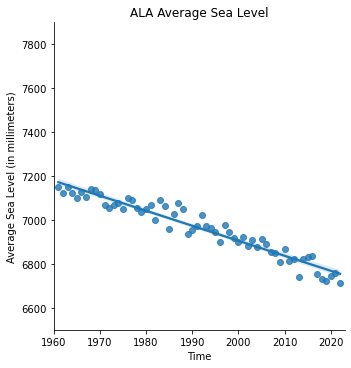

In [11]:
# The mean sea level over year for region ALA
ala_agg = sea.groupby("Year")["ALA"].agg(avg_sea_level = "mean").reset_index()

# Plots the aggregate
sns.lmplot(x='Year', y ='avg_sea_level', data = ala_agg, fit_reg=True)
ax = plt.gca()
ax.set_title("ALA Average Sea Level")
ax.set_ylim(6500, 7900)
ax.set_xlim(1960, 2023)
ax.set(xlabel = "Time", ylabel = "Average Sea Level (in millimeters)")


##### ALA Analysis
ALA still remains a negative trend, and indicates that that region's sea level decreases over time. In fact, according to this data, the sea level has dropped an estimated whopping 400 millimeters from 1961 to 2022. This is about 15.7 inches. The sea-level dropping this much in just 60 or so years is honestly frightening. 

[Text(0.5, 20.80000000000002, 'Time'),
 Text(12.206249999999997, 0.5, 'Average Sea Level (in millimeters)')]

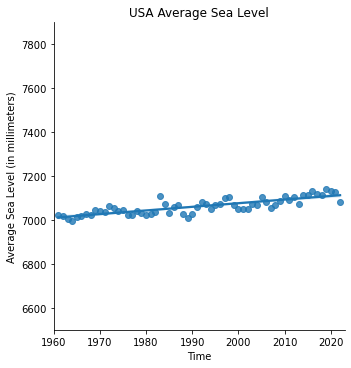

In [12]:
usa_agg = sea.groupby("Year")["USA"].agg(avg_sea_level = "mean").reset_index()

sns.lmplot(x='Year', y ='avg_sea_level', data = usa_agg, fit_reg=True)
ax = plt.gca()
ax.set_title("USA Average Sea Level")
ax.set_ylim(6500, 7900)
ax.set_xlim(1960, 2023)
ax.set(xlabel = "Time", ylabel = "Average Sea Level (in millimeters)")

##### USA Analysis

As seen in the scatterplot before, the sea level over the period of time of 1961-2022 in the US certainly has risen. However, with standardizing the axes, we noticed the slope is significantly less sleep. Thus we can conclude that the USA has had a less significant change in sea level then compared to other regions. 

[Text(0.5, 20.80000000000002, 'Time'),
 Text(12.206249999999997, 0.5, 'Average Sea Level (in millimeters)')]

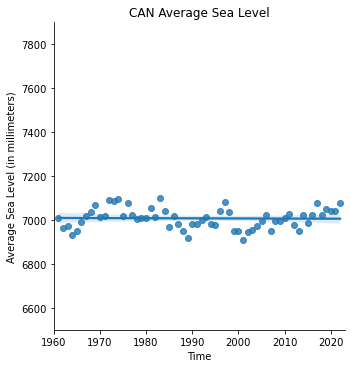

In [13]:
can_agg = sea.groupby("Year")["CAN"].agg(avg_sea_level = "mean").reset_index()

sns.lmplot(x='Year', y ='avg_sea_level', data = can_agg, fit_reg=True)
ax = plt.gca()
ax.set_title("CAN Average Sea Level")
ax.set_ylim(6500, 7900)
ax.set_xlim(1960, 2023)
ax.set(xlabel = "Time", ylabel = "Average Sea Level (in millimeters)")

##### CAN Analysis
Similar to before, while there is clearly a lot more variation around this linear regression line, ultimately, it appears to suggest that the average sea level over the course of 1961 to 2022 has in fact not changed for region CAN.

[Text(0.5, 20.80000000000002, 'Time'),
 Text(12.206249999999997, 0.5, 'Average Sea Level (in millimeters)')]

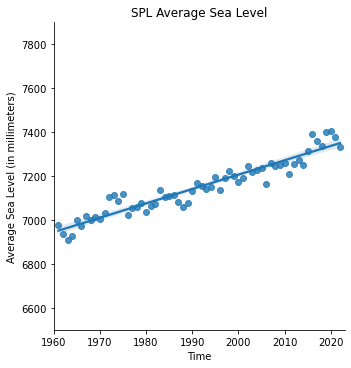

In [15]:
spl_agg = sea.groupby("Year")["SPL"].agg(avg_sea_level = "mean").reset_index()

sns.lmplot(x='Year', y ='avg_sea_level', data = spl_agg, fit_reg=True)
ax = plt.gca()
ax.set_title("SPL Average Sea Level")
ax.set_ylim(6500, 7900)
ax.set_xlim(1960, 2023)
ax.set(xlabel = "Time", ylabel = "Average Sea Level (in millimeters)")

##### SPL Analysis
SPL has clearly experienced a rise in average sea level per year over the course of 1961-2022. Interestingly it is similar in slope in the opposite direction of region ALA.

##### Sea Level In All Four Regions
The linear model appears to fit the trend of the data quite well for almost all of these 4 regions. Canada is the main one where the linear model seems to be performing the worst. 


#### Sea Level All Region Aggregate

Beyond just looking at the linear regression plot for a couple regions, or all regions if preferred, another way to look at how each region trended in comparison to the other regions is to graph them all on one graph. For the sake of not having very noisy graphs (remember the earlier scatter plots), we will be graphing the aggregate, the average sea level over year for each region.

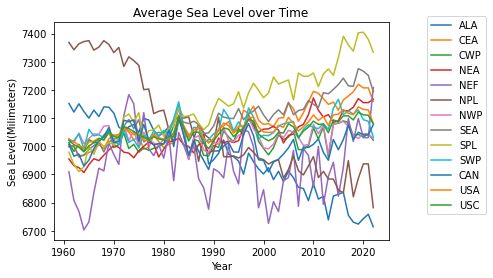

In [52]:
for col in sea:
    if col != 'Year' and col != 'Month' and col != 'DateTime':
        agg = sea.groupby("Year")[col].agg(avg_sea_level = "mean").reset_index()
        ax = plt.gca()
        ax.plot(agg.Year, agg.avg_sea_level, label = col)
        ax.legend(bbox_to_anchor=(1.1, 1.05)) # Moves the Legend outside of the Plot
        ax.set(xlabel = 'Year', ylabel = 'Sea Level(Milimeters)', title = 'Average Sea Level over Time')

##### Analyzing Average Sea Level
As seen above, the vast majority of the regions experienced an increase in average sea level over the course of 1961 - 2022. The SPL region appears to have experienced the highest sea level as of 2022. ALA instead has experienced a very steady drop in sea level. In  fact the graphs of SPL and ALA almost seem to mirror each other. Strangely enough, NPL experienced a very drastic initial drop in sea level from the duration of 1961 to 1980, before reaching a more steady dicline from 1980-2022.  

### 3.2 ACI Analysis

Similar to the SPL data, with the sheer amount of data we have, the scatterplots will have too much noise. So for the simplification of the process, we will just graph aggregates. As before, we will just do a linear regression plot of the 4 focused regions, `ALA`, `USA`, `CAN`, and `SPL`.

(1960.0, 2023.0)

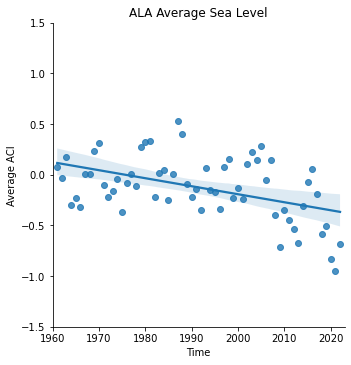

In [30]:
# The mean sea level over year for region ALA
ala_agg = aci.groupby("Year")["ALA"].agg(avg_aci = "mean").reset_index()

# Plots the aggregate
sns.lmplot(x='Year', y ='avg_aci', data = ala_agg, fit_reg=True)
ax = plt.gca()
ax.set_title("ALA Average Sea Level")
ax.set(xlabel = "Time", ylabel = "Average ACI")
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(1960, 2023)

(1960.0, 2023.0)

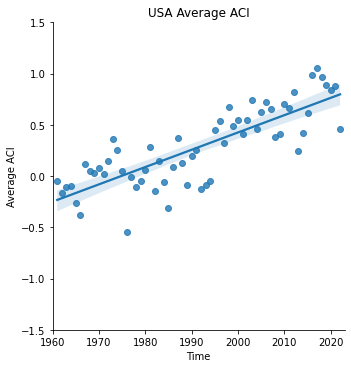

In [36]:
# The mean sea level over year for region USA
usa_agg = aci.groupby("Year")["USA"].agg(avg_aci = "mean").reset_index()

# Plots the aggregate lin reg plot
sns.lmplot(x='Year', y ='avg_aci', data = usa_agg, fit_reg=True)
ax = plt.gca()
ax.set_title("USA Average ACI")
ax.set(xlabel = "Time", ylabel = "Average ACI")
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(1960, 2023)

(1960.0, 2023.0)

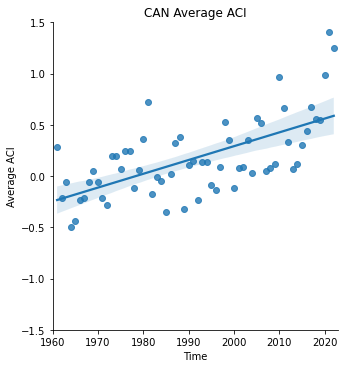

In [35]:
# The mean sea level over year for region CAN
can_agg = aci.groupby("Year")["CAN"].agg(avg_aci = "mean").reset_index()

# Plots the aggregate
sns.lmplot(x='Year', y ='avg_aci', data = can_agg, fit_reg=True)
ax = plt.gca()
ax.set_title("CAN Average ACI")
ax.set(xlabel = "Time", ylabel = "Average ACI")
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(1960, 2023)

(1960.0, 2023.0)

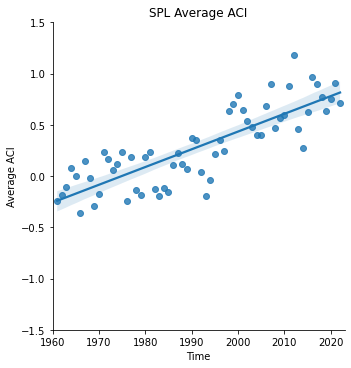

In [33]:
# The mean sea level over year for region SPL
spl_agg = aci.groupby("Year")["SPL"].agg(avg_aci = "mean").reset_index()

# Plots the aggregate
sns.lmplot(x='Year', y ='avg_aci', data = spl_agg, fit_reg=True)
ax = plt.gca()
ax.set_title("SPL Average ACI")
ax.set(xlabel = "Time", ylabel = "Average ACI")
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(1960, 2023)

#### Analyzing the Linear Regression Plots
The line model seems to map the trend of the data fairly well, even though it doesn't contain a lot of the points. Out of these 4 regions, the only one to experience a decline in ACI is region ALA. To be noted, even though it is a "decline", It is going from a standardized 0 to negative. This does NOT mean that ALA is experiencing positive environmental indicators, it just means that it's indicators are changing in the opposite direction to the other 3 regions.

What strikes me as interesting, as with these fixed axes we can do some comparisons across the regions of their linear regression line, and USA, CAN, and SPL, all experience a very similar increase in their average ACI. 

#### ACI All Region Aggregate Line Graph

I've chosen to split the graphs of the Average ACI over time of the 15 regions into two different graphs, as when they were on one graph, it was too noisy, and almost impossible to distinguish each line. This version is still relatively busy, but able to see just about every line. If the reader wants even more clarity, they can choose to split the number of graphs to 4, with 5 regions each to get an even clearer view. Just remember to set the xlim and ylim for both graphs so you are able to compare each of the graphs. 

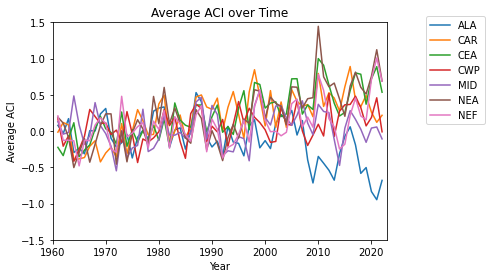

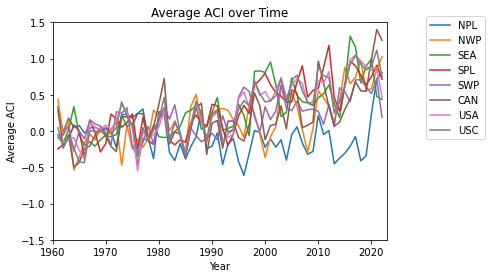

In [53]:
# ACI Part 1, the First 8 of the
aci_first_half = aci.drop(aci.columns[[9,10,11,12,13,14,15,16]], axis=1)

# ACI Part 2 The Other remaining regions
aci_second_half = aci.drop(aci.columns[[2,3,4,5,6,7,8]], axis = 1)

for col in aci_first_half:
    if col != 'Year' and col != 'Month' and col != 'DateTime':
        agg = aci_first_half.groupby("Year")[col].agg(avg_aci = "mean").reset_index()
        ax = plt.gca()
        ax.plot(agg.Year, agg.avg_aci, label = col)
        ax.legend(bbox_to_anchor=(1.1, 1.05))
        ax.set(xlabel = 'Year', ylabel = 'Average ACI', title = 'Average ACI over Time')
        ax.set_ylim(-1.5, 1.5)
        ax.set_xlim(1960, 2023)


ax = plt.figure()
for col in aci_second_half:
    if col != 'Year' and col != 'Month' and col != 'DateTime':
        agg = aci_second_half.groupby("Year")[col].agg(avg_aci = "mean").reset_index()
        ax = plt.gca()
        ax.plot(agg.Year, agg.avg_aci, label = col)
        ax.legend(bbox_to_anchor=(1.1, 1.05))
        ax.set(xlabel = 'Year', ylabel = 'Average ACI', title = 'Average ACI over Time')
        ax.set_ylim(-1.5, 1.5)
        ax.set_xlim(1960, 2023)

##### Analyzing Average ACI
As shown above, almost every single region has experienced a general increase over time of their average ACI, with ALA being the main exception. Of note is that the variation in ACI year by year appears to becoming increasingly more volatile. Looking at the region of 1960 to 1970 and comparing to 2010 and 2020, almost every single region seems to be experiencing larger peaks and valleys. What this means is that the ACI is fluctuating by greater amounts over time, causing further problems, as extreme phenomena indicative of increasing climate change occurs more frequently.

### 3.3 Predicting ACI
Let's see if we can use a linear model to predict what the ACI for a specified region will be in 2022. For the sake of this, lets pick our region to be the USA. While I've chosen to just use the linear model, it may be possible to look at alternative models, such as a poly-fit model, or a log-regression model, up to the person's discretion. Depending on the model, it may be necessary to choose hyperparameters, and do some training with data sets to assess the accuracy of the model.

In [120]:
X = aci[['Year']].values

Y = aci['USA'] 
model = LinearRegression()
model.fit(X,Y)
prediction = model.predict([[2040]])

print("Expected ACI for the USA Region in 2040: ", prediction)
print("Average ACI in 2020:", usa_agg.loc[usa_agg['Year'] == 2020].avg_aci.values)
print("Rate of Increase: ", model.coef_)

Expected ACI for the USA Region in 2040:  [1.12029755]
Average ACI in 2020: [0.84166667]
Rate of Increase:  [0.0172045]


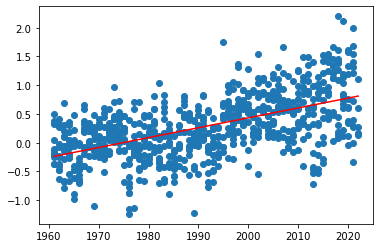

In [84]:
years = np.linspace(1961,2022, 62).reshape(-1,1)
predictions = model.predict(years)
plt.plot(years,predictions, "r-")
plt.scatter(x=aci['Year'], y = aci['USA'])

Creating this model allows us to predict the upcoming ACI for the USA region in years coming. With the graph above, despite the variation that comes from the nature of the data being time series data, it does a pretty good job at tracking the center, so we can get an estimate based on the year. According to the above prediction, in 2040, this model states that we will have an ACI of 1.12. From 2020 to 2040 that means an increase in ACI by about 0.4 over the span of 20 years. 

## Part 4: Hypothesis Testing

Unfortunately, according to the requirements of a lot of the testing procedures provided to us through the class, comparing statistical information isn't really an option for this data. This is because all of my data is time series data. What this means that one of the base requirements for tests like z-test, or t-test, require independent variables, which is not the case here.  

Instead what we can test is a stationary test of our time series data. This allows us to see if the variation could be due to seasons, or if the mean of the value is actually increasing over time. This can be done with a Stationary Test, also known as the Augmented Dickey Fuller Test. I found out about this hypothesis test for time series data from here: https://medium.com/analytics-vidhya/time-series-analysis-stationarity-check-using-statistical-test-f106e9045370#:~:text=Augmented%20Dickey%2DFuller%20is%20the,usually%20stationarity%20or%20trend%2Dstationarity.

Where I learned how to apply it in python: https://www.statology.org/dickey-fuller-test-python/

### Hypothesis Testing: Sea Level
Null Hypothesis: The time series sea level data for the region is non-stationary
Alternative Hypothesis: The time series sea level data for the region is stationary

For our purposes, I have set alpha, or the level of significance to 0.01. What this means is any p-value below 0.05 will result in the rejection of our null hypothesis. 

In [119]:
from statsmodels.tsa.stattools import adfuller
first_col = sea.columns
first_col = first_col[2:15]
stationary_seas = pd.DataFrame(first_col)
stationary_seas.columns = ['Region']
pvalue = []
stationary = []
for region in first_col:
    val = adfuller(sea[region])[1]
    pvalue.append(val)
    if val < .01:
        stationary.append('Yes')
    else:
        stationary.append('No')

stationary_seas['P-value'] = pvalue
stationary_seas['is_stationary'] = stationary 
display(stationary_seas)

,Region,P-value,is_stationary
0,ALA,0.767114,No
1,CEA,0.534967,No
2,CWP,0.000009,Yes
3,NEA,0.665108,No
4,NEF,0.000168,Yes
5,NPL,0.483801,No
6,NWP,0.000005,Yes
7,SEA,0.662158,No
8,SPL,0.705319,No
9,SWP,0.000133,Yes


What does stationary mean? Stationary means that all the variation in the data is due to seasonal differences, or due to the natural changes over time, instead of indicative of any increase. What this tells us is that over our time period of 1961 to 2022, the regions `CWP`, `NEF`, `NWP`, `SWP`, and `CAN` did not have an increase in sea level. The others all had a change of some kind. 


### Hypothesis Testing: ACI
Null Hypothesis: The time series ACI data for the region is non-stationary
Alternative Hypothesis: The time series ACI level data for the region is stationary

For our purposes, I have set alpha, or the level of significance to 0.05. What this means is any p-value below 0.05 will result in the rejection of our null hypothesis. 

In [118]:
first_col = aci.columns[2:17]
stationary_aci = pd.DataFrame(first_col)
stationary_aci.columns = ['Region']
pvalue = []
stationary = []
for region in first_col:
    val = adfuller(aci[region])[1]
    pvalue.append(val)
    if val < .01:
        stationary.append('Yes')
    else:
        stationary.append('No')

stationary_aci['P-value'] = pvalue
stationary_aci['is_stationary'] = stationary
display(stationary_aci)

,Region,P-value,is_stationary
0,ALA,2.463143e-08,Yes
1,CAR,1.563927e-03,Yes
2,CEA,7.328380e-03,Yes
3,CWP,4.418778e-28,Yes
4,MID,8.202046e-16,Yes
5,NEA,8.628938e-03,Yes
6,NEF,1.666673e-05,Yes
7,NPL,2.852624e-07,Yes
8,NWP,3.106052e-02,No
9,SEA,2.666361e-02,No


Interestingly enough, this is not what I expected. When looking at the graphs of the aggregate ACI over time for almost all the regions there seems to display a subtle increase over time. The larger regions of CAN an USA however show that the ACI was not stationary. Looking at the results, there seems to be a factor that the dataset I've used is standardized ACI, which may cause the fluctuations, while visible on the graph, not be seen as large enough for the dickey fuller test to classify it as not a seasonal variation. 

## Conclusion/Insights

Throughout the course of this project, I was able to get a better look at how two indicators of environmental health, sea level, and the Actuaries Climate Index, have changed over the duration of 1961 to 2021 over a variety of regions. I was able to get a keener insight into how sea level actually fluctuates. Firstly of interest, is that over time, just naturally, both sea-level and aci fluctuate a lot for seasonal/yearly trends. Additionally, as climate change has worsened, it impact these environmental factors differently. 

The fact that for sea level, that some regions, like ALA, or alaska, experience a large decline compared to a majority of locations experiencing a steady rise in sea-level, really underlines just how complicated and varied the environment is. Climate-change has a large and varied impact on different regions, these different impacts create different types of problems, and require different solutions. It honestly gave me a bit more of an idea of why it's so difficult to get a global consensus on climate-change efforts. For sea level, some regions just experienced far lower of a sea level rise compared to other regions. For that reason, since it impacts certain countries less, they feel less inclined to make these changes and policies to hopefully slow down the progression of climate change. 

With the ACI, the overall measurement for this dataset of climate change, I was able to both observe the trends of all 15 regions, but also model and predict its future values. For ACI, it's yearly change is .017, which is quite scary. While 1.7% doesn't on it's own seem like a huge number, since ACI represents the average of all the environmental indicators in this dataset, if all of those components individually change by 1.7%, all together they can exacerbate each other, until we get to a point where nothing can be changed, and the damage to human life and the environemnt is irreversable.

#### Further Exploration
As always, anything can be done better. There's always more improvements.

As a single person I was only able to do so much with the data within this dataset. Ideally, if I was given more time, I would've liked to do visualizations for every single environmental indicator variable in the data set(CDD, Rx5Day, T10, T90, and WP90). These are all interesting variables in their own right, and I would've liked to be able to explore them in depth. Beyond just this data-set however, is that it would have been ideal if we could match the individual variables with impacts on human life, whether that's disasters, deaths, or disease. Ultimately, the beauty of data science is that you're able to expand what you're researching immensely. Imagine the amount of time it would have taken to do this manually, with this tutorial we're able to take a peek at what data science is capable of, and the value visualizations have for interpreting data.

Ultimately, thank you for reading this tutorial, I hope you have a wonderful winter break! 

![Winter](winter.jpg "Title")